In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0,1], [0, -6]])
B = np.array([0,1])
x_0 = np.array([0,0])
x_k = np.array([1,0])

In [3]:
u = lambda psi: 4*np.sign(psi)

In [4]:
def get_psi_1(c):
    def psi_1(t):
        return c;
    return psi_1

In [5]:
def get_psi_2(c):
    def psi_2(t):
        return c/6 + (0.25 - c/6)*np.exp(6*t)
    return psi_2

In [6]:
from scipy.integrate import odeint
from tqdm import tqdm

## Task 1

In [7]:
init_cond = [0, 0]
t_end = 5
n = 1000
t_eval = np.linspace(0, t_end, n+1)
dt = 0.01
tolerance = 0.001

In [8]:
# sol = odeint(system_full, init_cond, t_eval)

In [9]:
C_curr = 20
C_best = C_curr
dC = 1
max_iterations = 100
C_sup = -1
C_inf = 1.5
last_rk_iter = None
sol = None

In [10]:
for iter in range(max_iterations):
    n = 1000
    sol = np.zeros((n, 2))
    x = init_cond
    last_rk_iter = n-1
    found = False
    psi_2 = get_psi_2(C_curr)
    def system_full(x, t):
        return np.array(A @ x + B * u(psi_2(t)))
    sol = odeint(system_full, init_cond, np.arange(0, n*dt, dt))
    for i in range(n):
        if sol[i,1] < 0:
            last_rk_iter = i
            found = True
            break

    if iter:
        print(f'C = {C_curr:5}.\t x0 = {sol[last_rk_iter,0]:5} \t x1 = {sol[last_rk_iter,1]:5}')
    if abs(sol[last_rk_iter,0] - 1) < tolerance:
        C_best = C_curr
        break
    if sol[last_rk_iter,0] > 1:
        C_inf = C_curr
        if C_sup < 0:
            C_curr += dC
        else:
            C_curr = (C_inf + C_sup) * 0.5
    else:
        C_sup = C_curr
        C_curr = (C_inf + C_sup) * 0.5


C = 10.75.	 x0 = 0.002164541011961088 	 x1 = -0.012610958378372887
C = 6.125.	 x0 = 0.006784190201015119 	 x1 = -0.02616865177253257
C = 3.8125.	 x0 = 0.01868272841655328 	 x1 = -0.005488379577270719
C = 2.65625.	 x0 = 0.04258040354610474 	 x1 = -0.02650463301011421
C = 2.078125.	 x0 = 0.08170834605128081 	 x1 = -0.024341775291324287
C = 1.7890625.	 x0 = 0.13483300682143062 	 x1 = -0.01859260893077205
C = 1.64453125.	 x0 = 0.19807923232895744 	 x1 = -0.026188805314409827
C = 1.572265625.	 x0 = 0.26773065999258844 	 x1 = -0.01981812616548954
C = 1.5361328125.	 x0 = 0.34094071268454706 	 x1 = -0.005881524853167404
C = 1.51806640625.	 x0 = 0.41590031045361553 	 x1 = -0.027217198716424647
C = 1.509033203125.	 x0 = 0.4920112903564133 	 x1 = -0.0076444056140833536
C = 1.5045166015625.	 x0 = 0.5684485556625238 	 x1 = -0.026068560561284444
C = 1.50225830078125.	 x0 = 0.6452987698874475 	 x1 = -0.004976374477006348
C = 1.501129150390625.	 x0 = 0.72212672143523 	 x1 = -0.02275049739117129
C = 1.

In [11]:
C_best

1.500092625617981

In [12]:
_psi_2 = get_psi_2(C_best)

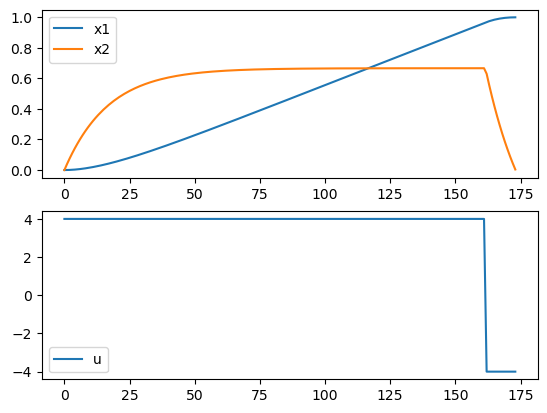

In [13]:
ax1 = plt.subplot(2,1,1)
plt.plot(sol[:last_rk_iter,], label=['x1','x2'])
plt.legend()

plt.subplot(2,1,2, sharex=ax1)
plt.plot(u(_psi_2(np.arange(0, last_rk_iter*dt, dt))), label='u')
plt.legend()
plt.show()

## Task 2

\*магические манипуляции с формулами у меня в тетради\*

$u = 4$

$
x_1 = \frac{1}{4}[-\frac{2}{3}x_2 - ln|\frac{2}{3} x_2 - 1|] + k_1
$

$
k_1 = x_1(0) + \frac{1}{4}[\frac{2}{3} x_2(0) + ln|\frac{2}{3} x_2(0) - 1|]
$
__________
$u = -4$

$
x_1 = \frac{1}{4}[-\frac{2}{3}x_2 + ln|\frac{2}{3} x_2 + 1|] + k_2
$

$
k_2 = x_1(0) + \frac{1}{4}[\frac{2}{3} x_2(0) - ln|\frac{2}{3} x_2(0) + 1|]
$

Здесь специально привёл функции к такому виду, что графики для $u=4$ и $u=-4$ симметричны (при $k_1 = -k_2$) относительно центра $(0, 0)$. Причём при $k_1$ = $k_2$ = 0 они пересекаются в $(0, 0)$. Это важно, так как наша конечная цель - попасть в центральную точку $(0, 0)$.

In [14]:
def get_phase_pos(k):
    def x_1(x_2):
        return -x_2/6 - 0.25 *np.log(np.abs(x_2/1.5 - 1)) + k
    return x_1

def get_phase_neg(k):
    def x_1(x_2):
        return -x_2/6 + 0.25 *np.log(np.abs(x_2/1.5 + 1)) + k
    return x_1

In [15]:
k_arr = np.linspace(0, 1, 5)

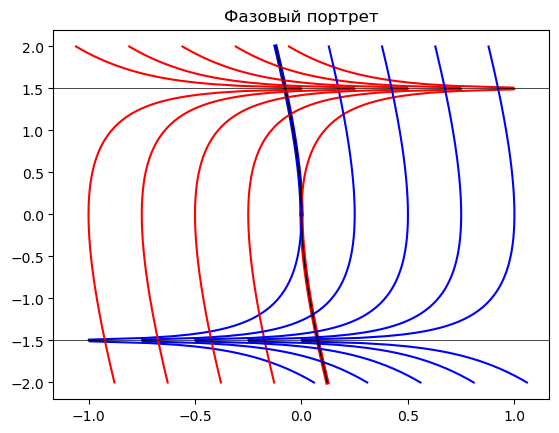

In [16]:
x_2 = np.linspace(-2, 0, 150)
x_1_foo = get_phase_pos(0)
plt.plot(x_1_foo(x_2), x_2, 'r', lw=3)

x_2 = np.linspace(0, 2, 150)
x_1_foo = get_phase_neg(0)
plt.plot(x_1_foo(x_2), x_2, 'b', lw=3)

for k in k_arr:
    x_2 = np.concatenate([np.linspace(-2, 1, 150)[:-1], np.linspace(1, 2, 50)[1:]])
    x_1_foo = get_phase_pos(-k)
    plt.plot(x_1_foo(x_2), x_2, 'r')

    x_2 = np.concatenate([np.linspace(-2, -1, 50)[:-1], np.linspace(-1, 2, 150)[1:]])
    x_1_foo = get_phase_neg(k)
    plt.plot(x_1_foo(x_2), x_2, 'b')

x_2 = np.linspace(-2, 0, 150)
x_1_foo = get_phase_pos(0)
plt.plot(x_1_foo(x_2), x_2, 'k', lw=1)

x_2 = np.linspace(0, 2, 150)
x_1_foo = get_phase_neg(0)
plt.plot(x_1_foo(x_2), x_2, 'k', lw=1)

# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.title('Фазовый портрет')
plt.axhline(y=1.5, color='k', lw=0.5)
plt.axhline(y=-1.5, color='k', lw=0.5)
plt.show()

In [162]:
def u_2(x):
    # if np.abs(4*x[0] + x[1] / 1.5 - np.sign(x[1]) * np.log(np.abs(x[1] / 1.5 + np.sign(x[1])))) < 0.00001:
    #     return 4*np.sign(-x[1])
    return 4*np.sign(-4*x[0] - x[1] / 1.5 + np.sign(x[1])*np.log(np.abs(x[1] / 1.5 + np.sign(x[1]))))

In [163]:
dots = np.random.uniform(-1.49, 1.49, (10, 2))
t_end = 5
n = 150
# t_eval = np.linspace(0, t_end, n+1)
dt = 0.01
sols = np.zeros((dots.shape[0], n, 2))

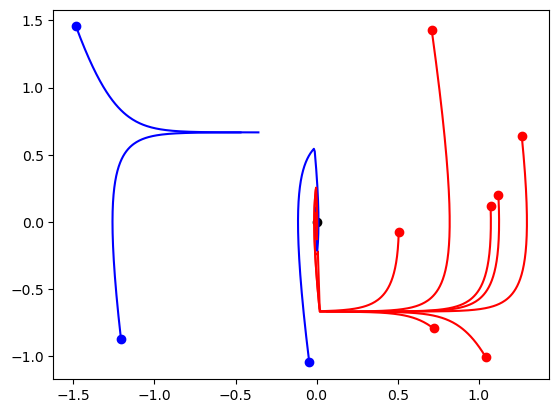

In [166]:
for i, init_dot in enumerate(dots):
    x = init_dot
    def system_full_2(x, t):
        if np.abs(x).sum() < 0.001:
            return [0,0]
        return np.array(A @ x + B * u_2(x))
    sols[i] = odeint(system_full_2, x, np.arange(0, n*dt, dt))
    if u_2(init_dot) > 0:
        plt.plot(sols[i,:,0], sols[i,:,1], 'b')
        plt.scatter(init_dot[0], init_dot[1], color='b')
    else:
        plt.plot(sols[i,:,0], sols[i,:,1], 'r')
        plt.scatter(init_dot[0], init_dot[1], color='r')
plt.scatter(0, 0, color='k')
plt.show()
